### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load Dataset

The application data will be used for feature creation. And the credit history will be required for defining the labels - which of the applications have paid back dues and which of these turn out to bad accounts.

In [35]:
application = pd.read_csv('application_history.csv')
credit_history = pd.read_csv('credit_history.csv')

### Exploratory Data Analysis

**1. Application**

The application information is used for assessing the creditworthiness of the customer.

In [3]:
application.head()

Id_customer         JK KepemilikanMobil KepemilikanProperti  JmlAnak  \
0      5008804  Laki-laki               Ya                  Ya        0   
1      5008805  Laki-laki               Ya                  Ya        0   
2      5008806  Laki-laki               Ya                  Ya        0   
3      5008808  Perempuan            Tidak                  Ya        0   
4      5008809  Perempuan            Tidak                  Ya        0   

   Pendapatan      TipePendapatan TingkatPendidikan StatusKeluarga  \
0    427500.0             Bekerja      Postgraduate        Menikah   
1    427500.0             Bekerja      Postgraduate        Menikah   
2    112500.0             Bekerja          Graduate        Menikah   
3    270000.0  Asosiasi komersial          Graduate  Belum Menikah   
4    270000.0  Asosiasi komersial          Graduate  Belum Menikah   

        TipeRumah  FlagMobile  FlagWorkPhone  FlagPhone  Email  \
0  Sewa Apartemen           1              1          0      0   
1  Sewa Apartemen           1              1          0      0   
2   Rumah pribadi           1              0          0      0   
3   Rumah pribadi           1              0          1      1   
4   Rumah pribadi           1              0          1      1   

        Pekerjaan  JmlAnggotaKeluarga  Age  Experience  
0             NaN                   2   33          12  
1             NaN                   2   33          12  
2  Security staff                   2   59           3  
3     Sales staff                   1   52           8  
4     Sales staff                   1   52           8

In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438456 entries, 0 to 438455
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Pekerjaan            304213 non-null  object 
 15  JmlAnggotaKeluarg

**Summary Statictics**

In [5]:
application.describe()

Id_customer        JmlAnak    Pendapatan  FlagMobile  FlagWorkPhone  \
count  4.384560e+05  438456.000000  4.384560e+05    438456.0  438456.000000   
mean   6.022392e+06       0.427363  1.875187e+05         1.0       0.206080   
std    5.715402e+05       0.724867  1.100668e+05         0.0       0.404489   
min    5.008804e+06       0.000000  2.610000e+04         1.0       0.000000   
25%    5.609478e+06       0.000000  1.215000e+05         1.0       0.000000   
50%    6.047816e+06       0.000000  1.606050e+05         1.0       0.000000   
75%    6.457021e+06       1.000000  2.250000e+05         1.0       0.000000   
max    7.999952e+06      19.000000  6.750000e+06         1.0       1.000000   

           FlagPhone          Email  JmlAnggotaKeluarga            Age  \
count  438456.000000  438456.000000       438456.000000  438456.000000   
mean        0.287778       0.108278            2.194423      43.834973   
std         0.452728       0.310731            0.897213      11.473102   
min         0.000000       0.000000            1.000000      21.000000   
25%         0.000000       0.000000            2.000000      34.000000   
50%         0.000000       0.000000            2.000000      43.000000   
75%         1.000000       0.000000            3.000000      53.000000   
max         1.000000       1.000000           20.000000      69.000000   

          Experience  
count  438456.000000  
mean      177.988247  
std       374.967702  
min         0.000000  
25%         3.000000  
50%         7.000000  
75%        16.000000  
max      1001.000000

Observation from summary statictics

- JmlAnak : 75th percentile is 1 and Max is 19, we may need to check for outliers.
- JmlAnggotaKeluarga : 75th percentile is 3 and Max is 20, we may need to check for outliers.
- Experience : 75th percentile is 16 and Max is 1001, we may need to check for outliers.
- FlagMobile : Min and Max values are same, so may not be of any use.

**Distribution of Customer Application Details**

In [6]:
application

Id_customer         JK KepemilikanMobil KepemilikanProperti  JmlAnak  \
0           5008804  Laki-laki               Ya                  Ya        0   
1           5008805  Laki-laki               Ya                  Ya        0   
2           5008806  Laki-laki               Ya                  Ya        0   
3           5008808  Perempuan            Tidak                  Ya        0   
4           5008809  Perempuan            Tidak                  Ya        0   
...             ...        ...              ...                 ...      ...   
438451      5009372  Laki-laki               Ya               Tidak        0   
438452      5009373  Laki-laki               Ya               Tidak        0   
438453      6153586  Laki-laki               Ya               Tidak        0   
438454      6153587  Laki-laki               Ya               Tidak        0   
438455      5009426  Laki-laki            Tidak               Tidak        0   

        Pendapatan      TipePendapatan TingkatPendidikan StatusKeluarga  \
0         427500.0             Bekerja      Postgraduate        Menikah   
1         427500.0             Bekerja      Postgraduate        Menikah   
2         112500.0             Bekerja          Graduate        Menikah   
3         270000.0  Asosiasi komersial          Graduate  Belum Menikah   
4         270000.0  Asosiasi komersial          Graduate  Belum Menikah   
...            ...                 ...               ...            ...   
438451    115290.0           Pensioner          Graduate        Menikah   
438452    115290.0           Pensioner          Graduate        Menikah   
438453    115290.0           Pensioner          Graduate        Menikah   
438454    115290.0           Pensioner          Graduate        Menikah   
438455     99000.0           Pensioner          Graduate        Menikah   

             TipeRumah  FlagMobile  FlagWorkPhone  FlagPhone  Email  \
0       Sewa Apartemen           1              1          0      0   
1       Sewa Apartemen           1              1          0      0   
2        Rumah pribadi           1              0          0      0   
3        Rumah pribadi           1              0          1      1   
4        Rumah pribadi           1              0          1      1   
...                ...         ...            ...        ...    ...   
438451   Rumah pribadi           1              0          1      1   
438452   Rumah pribadi           1              0          1      1   
438453   Rumah pribadi           1              0          1      1   
438454   Rumah pribadi           1              0          1      1   
438455   Rumah pribadi           1              0          0      0   

             Pekerjaan  JmlAnggotaKeluarga  Age  Experience  
0                  NaN                   2   33          12  
1                  NaN                   2   33          12  
2       Security staff                   2   59           3  
3          Sales staff                   1   52           8  
4          Sales staff                   1   52           8  
...                ...                 ...  ...         ...  
438451             NaN                   2   64        1001  
438452             NaN                   2   64        1001  
438453             NaN                   2   64        1001  
438454             NaN                   2   64        1001  
438455             NaN                   2   55        1001  

[438456 rows x 18 columns]

In [7]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(7, 7))
        ax=sns.countplot(y=application[feature] , data=application)
        total = len(application[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

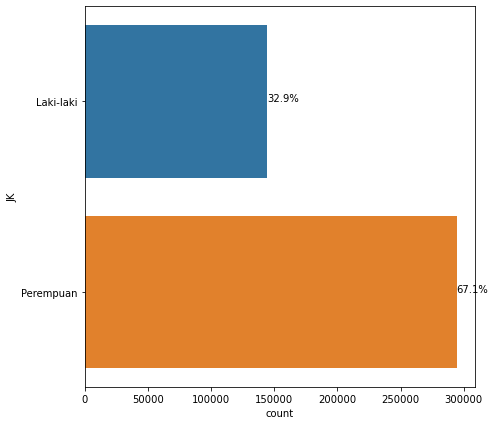

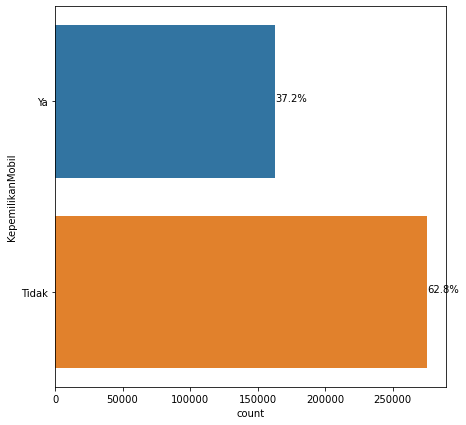

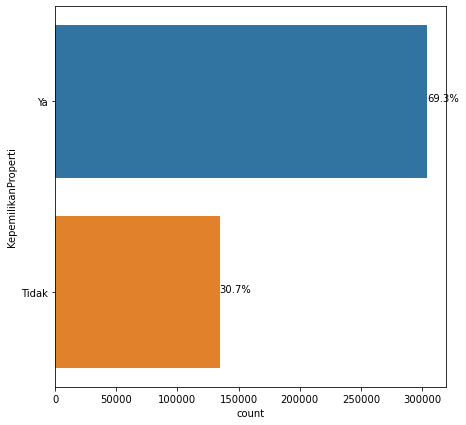

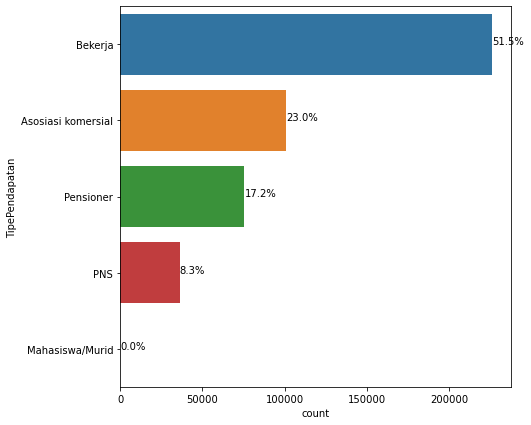

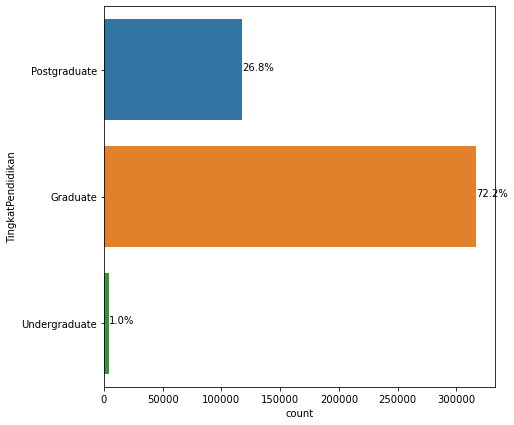

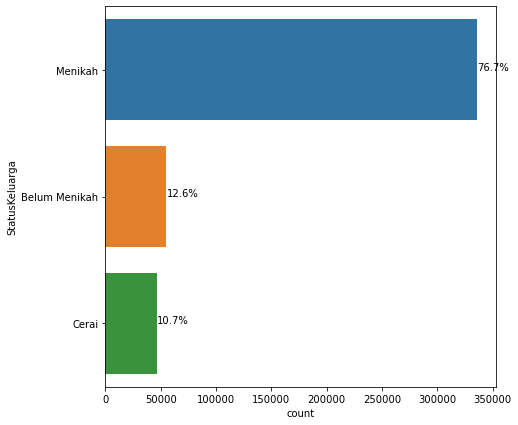

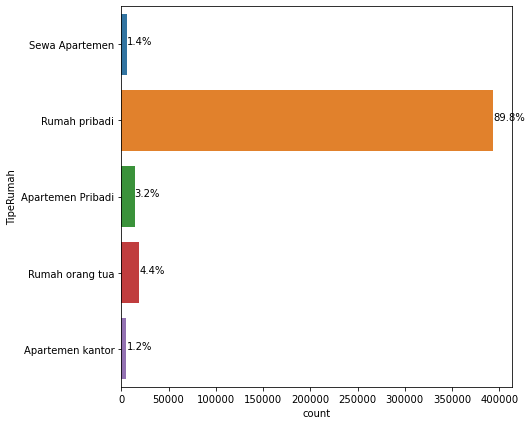

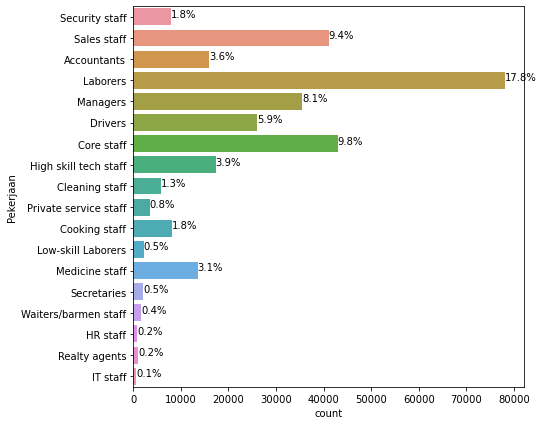

In [8]:
countplot_applicants(['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
                      'TingkatPendidikan','StatusKeluarga', 'TipeRumah', 'Pekerjaan'])

**Observation from Categorical Variables Visualization Plot**

- For JK (Gender) : The percentage of female applicants is greater than male applicants.
- For KepemilikanMobil (Car ownership) : The Percentage of applicant who has no car is greater than who have their own car.
- For KepemilikanProperti : The percentage of applicant who has their own property is greater than who hasn't
- For TipePendapatan : The percentage of income from work/labor (Bekerja) is greater than other types.
- For TingkatPendidikan : The percentage of applicant who has graduated or postgraduated is greater than who hasn't yet.
- For StatusKeluarga : The percentage of applicant who already married is gerater than who hasn't or divorce
- For TipeRumah : The percentage of applicant who have their own house is greater than other types (rent, family house, apartment)
- For Pekerjaan : The percentage of applicant who are laborers is greater than other types of occupations.

**2. Credit History**

In [9]:
credit_history.head()

Id_customer                  Overdue
0      5001711  Tidak memiliki pinjaman
1      5001711                        0
2      5001711                        0
3      5001711                        0
4      5001712                        0

In [10]:
credit_history.Overdue.unique()

array(['Tidak memiliki pinjaman', '0', '1', '2', '3', '4', '5'],
      dtype=object)

Overdue : Status of credit payment.
- 0: 1-29 days past due
- 1: 30-59 days past due
- 2: 60-89 days overdue
- 3: 90-119 days overdue
- 4: 120-149 days overdue
- 5: Overdue or bad debts
- Tidak Memiliki Pinjaman

In [11]:
#Credit History distribution
print("Distribution of credit payment\n", credit_history['Overdue'].value_counts(ascending=False))

Distribution of credit payment
 0                          821230
Tidak memiliki pinjaman    208755
1                           10936
5                            1677
2                             849
3                             317
4                             222
Name: Overdue, dtype: int64


In [12]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(7, 7))
        plt.title("Distribution of Credit History")
        ax=sns.countplot(y=credit_history[feature], data=credit_history)
        total = len(credit_history[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    

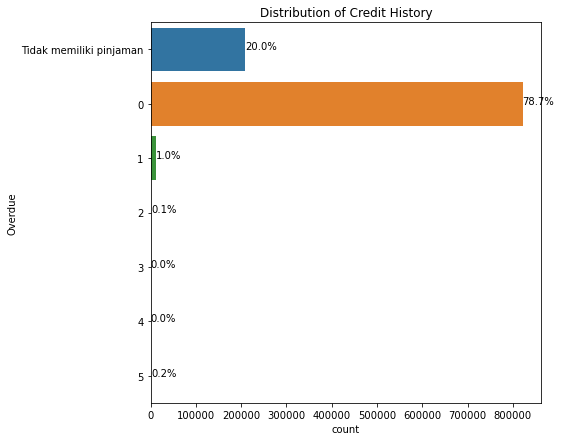

In [13]:
countplot_credit(['Overdue'])

**Observation from Credit History Distribution**

- 78.7% of customers assumed have good history of credit or already pay the loan
- 20% of customers do not have loan
- only 1% of customers are type 3 or assumed have overdue (30-59 days)
- 0.1 % of customers are type 2 or assumed have overdue (60-89 days)
- 0.2% of customers are type 5 or assumed have bad credit 
- Other types (3 and 4) have smallest percentage of bad credit.

In conclusion customers who have bad credit is less than 2% of total percentage.

### Correlation Analysis

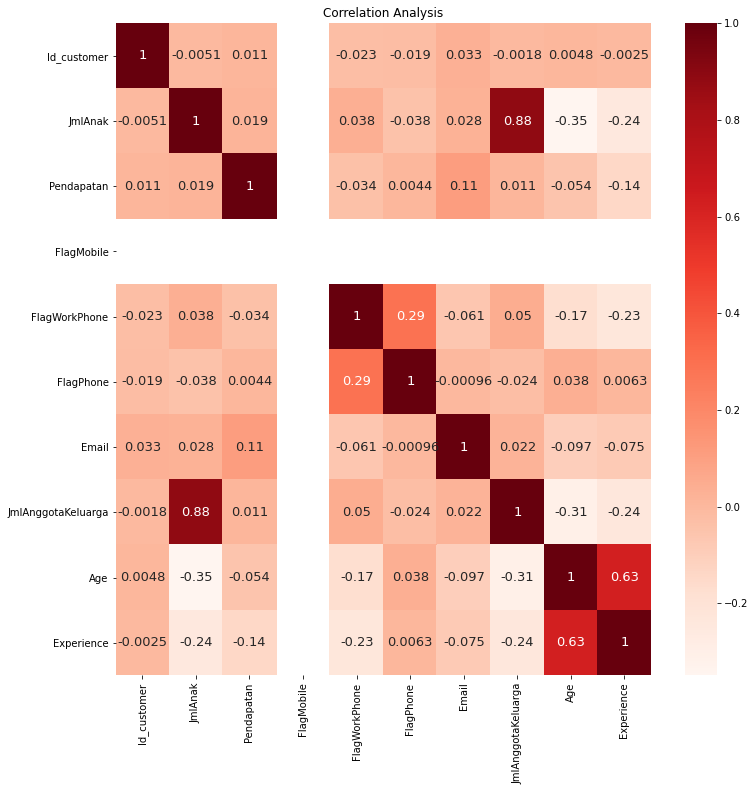

In [14]:
# Analysis correlation in dataset
plt.figure(figsize=(12,12))
cor = application.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 13})
plt.title("Correlation Analysis")
plt.show()

- From correlation analysis, variables "JmlAnggotaKeluarga" amd "JmlAnak" have high correlation, therefore we may need to remove one of this variables which is "JmlAnak"
- From correlation analysis, variables "Age" and "Experience" have high correlation, therefore we may need to remove one of this variables which is "Experience", in which in summary statistics observation, we see there is outlier in variables "Experience too.
- From correlation analysis, variables "FlagPhone" and "FlagWorkPhone" have moderate correlation, and also seems similar therefore we may need to take out "FlagWorkPhone"

### Data Pre Processing

In [15]:
application.isnull().sum()

Id_customer                 0
JK                          0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              134243
JmlAnggotaKeluarga          0
Age                         0
Experience                  0
dtype: int64

There are 133243 missing rows for Pekerjaan. We will not remove this rows, instead we will impute missing values by see the majority occupations. So, first we try to check majority jobs based on gender (JK) and Education

Text(0.5, 1.0, 'Occupation based on Gender')

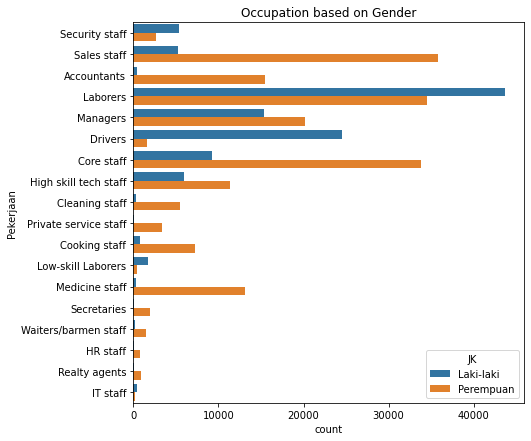

In [16]:
#Occupation based on gender
plt.rcParams["figure.figsize"] = (7,7)
sns.countplot(y=application['Pekerjaan'],hue='JK', data=application)
plt.title("Occupation based on Gender")

We found that, majority jobs for male applicants are :- labours, and drivers majority jobs for female applicants are :- sales staff, and labours

Text(0.5, 1.0, 'Occupation based on Gender')

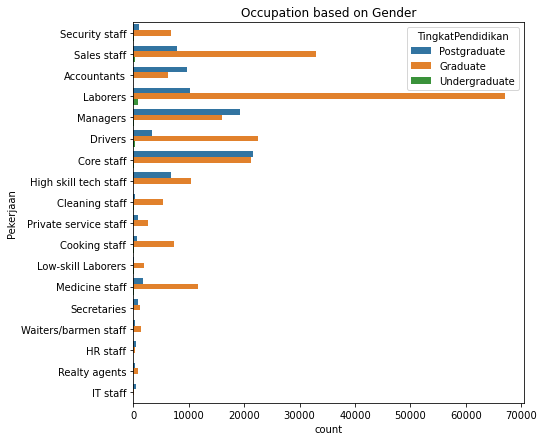

In [17]:
#Occupation based oon gender
plt.rcParams["figure.figsize"] = (7,7)
sns.countplot(y=application['Pekerjaan'],hue='TingkatPendidikan', data=application)
plt.title("Occupation based on Gender")

**Replace Missing Value of Occupation Based on Educations and Gender**

In [18]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=application.loc[application['Pekerjaan'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['JK'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['TingkatPendidikan'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)

In [19]:
occupation_by_education_by_gender(list(application['Pekerjaan'].unique()), list(application['TingkatPendidikan'].unique()), list(application['JK'].unique()), len(application))

In [20]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [21]:
#Met Conditions
occupation_popularity.loc[occupation_popularity.groupby(['Gender','Education'])['Popularity Percentage'].idxmax()]  

Gender      Education  Occupation  Popularity Percentage
23  Laki-laki       Graduate    Laborers               0.084296
5   Laki-laki   Postgraduate    Managers               0.019744
42  Laki-laki  Undergraduate    Laborers               0.001425
80  Perempuan       Graduate    Laborers               0.068796
64  Perempuan   Postgraduate  Core staff               0.039026
99  Perempuan  Undergraduate    Laborers               0.000652

In [22]:
#Replace missing values with conditions
common = application['Pekerjaan'].isnull()
all_conditions = [(application['JK'] == 'Laki-laki') & (application['TingkatPendidikan'] == 'Graduate') & (common),
                  (application['JK'] == 'Laki-laki') & (application['TingkatPendidikan'] == 'Postgraduate') & (common),
                  (application['JK'] == 'Laki-laki') & (application['TingkatPendidikan'] == 'Undergraduate') & (common),
                  (application['JK'] == 'Perempuan') & (application['TingkatPendidikan'] == 'Graduate') & (common),
                  (application['JK'] == 'Perempuan') & (application['TingkatPendidikan'] == 'Postgraduate') & (common),
                  (application['JK'] == 'Perempuan') & (application['TingkatPendidikan'] == 'Undergraduate') & (common)]

fill_with = ['Laborers', 'Managers', 'Laborers', 'Laborers', 'Core staff', 'Laborers']
application['Pekerjaan'] = np.select(all_conditions, fill_with, default=application['Pekerjaan'])

In [23]:
application.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
dtype: int64

In [24]:
application['Pekerjaan'].unique()

array(['Managers', 'Security staff', 'Sales staff', 'Core staff',
       'Accountants', 'Laborers', 'Drivers', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

**Remove unnecessary and Unwanted Data**

- FlagMobil : Min and Max values are same, so may not be of any use.
- Variables "JmlAnggotaKeluarga" and "JmlAnak" have high correlation, therefore we may need to remove one of this variables which is "JmlAnak"
- Variables "Age" and "Experience" have high correlation, therefore we may need to remove one of this variables which is "Experience", in which in summary statistics observation, we see there is outlier in variables "Experience too


In [25]:
application = application.drop(['FlagMobile', 'JmlAnak', 'Experience', 'FlagWorkPhone'], axis=1)

In [26]:
application.columns

Index(['Id_customer', 'JK', 'KepemilikanMobil', 'KepemilikanProperti',
       'Pendapatan', 'TipePendapatan', 'TingkatPendidikan', 'StatusKeluarga',
       'TipeRumah', 'FlagPhone', 'Email', 'Pekerjaan', 'JmlAnggotaKeluarga',
       'Age'],
      dtype='object')

**Encoding Categorical Features to Numerical Values**

In [27]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(application[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        application.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [28]:
categorical_features = ['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
                      'TingkatPendidikan','StatusKeluarga', 'TipeRumah', 'Pekerjaan']
Cat_to_Num(categorical_features)

JK --> {'Laki-laki': 0, 'Perempuan': 1}
KepemilikanMobil --> {'Tidak': 0, 'Ya': 1}
KepemilikanProperti --> {'Tidak': 0, 'Ya': 1}
TipePendapatan --> {'Asosiasi komersial': 0, 'Bekerja': 1, 'Mahasiswa/Murid': 2, 'PNS': 3, 'Pensioner': 4}
TingkatPendidikan --> {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
StatusKeluarga --> {'Belum Menikah': 0, 'Cerai': 1, 'Menikah': 2}
TipeRumah --> {'Apartemen Pribadi': 0, 'Apartemen kantor': 1, 'Rumah orang tua': 2, 'Rumah pribadi': 3, 'Sewa Apartemen': 4}
Pekerjaan --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}


In [29]:
application.head()

Id_customer  JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  \
0      5008804   0                 1                    1    427500.0   
1      5008805   0                 1                    1    427500.0   
2      5008806   0                 1                    1    112500.0   
3      5008808   1                 0                    1    270000.0   
4      5008809   1                 0                    1    270000.0   

   TipePendapatan  TingkatPendidikan  StatusKeluarga  TipeRumah  FlagPhone  \
0               1                  1               2          4          0   
1               1                  1               2          4          0   
2               1                  0               2          3          0   
3               0                  0               0          3          1   
4               0                  0               0          3          1   

   Email  Pekerjaan  JmlAnggotaKeluarga  Age  
0      0         10                   2   33  
1      0         10                   2   33  
2      0         16                   2   59  
3      1         14                   1   52  
4      1         14                   1   52

**Credit History Data**

In [36]:
convert_to = {'Tidak memiliki pinjaman' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_history.replace({'Overdue' : convert_to}, inplace=True)

In [37]:
credit_history['Overdue'].unique()

array(['Good_Debt', 'Neutral_Debt', 'Bad_Debt'], dtype=object)

In [38]:
credit_history['Overdue'].value_counts()

Good_Debt       1029985
Neutral_Debt      11785
Bad_Debt           2216
Name: Overdue, dtype: int64

**Counting the number of debts**

In [33]:
credit_history = credit_history.value_counts(subset=['Id_customer', 'Overdue']).unstack(fill_value=0)

In [34]:
credit_history

Overdue      Bad_Debt  Good_Debt  Neutral_Debt
Id_customer                                   
5001711             0          4             0
5001712             0         19             0
5001713             0         22             0
5001714             0         15             0
5001715             0         60             0
...               ...        ...           ...
5150482             0         18             0
5150483             0         18             0
5150484             0         13             0
5150485             0          2             0
5150487             0         30             0

[45785 rows x 3 columns]

**Creating Credit Approval Status**

In [35]:
credit_history.loc[(credit_history['Good_Debt'] > credit_history['Neutral_Debt']), 'Credit_Approval_Status'] = 1
credit_history.loc[(credit_history['Good_Debt'] > credit_history['Bad_Debt']), 'Credit_Approval_Status']= 1
credit_history.loc[(credit_history['Neutral_Debt'] > credit_history['Good_Debt']), 'Credit_Approval_Status'] = 0
credit_history.loc[(credit_history['Neutral_Debt'] > credit_history['Bad_Debt']), 'Credit_Approval_Status'] = 1
credit_history.loc[(credit_history['Bad_Debt'] > credit_history['Good_Debt']), 'Credit_Approval_Status'] = 0
credit_history.loc[(credit_history['Bad_Debt'] > credit_history['Neutral_Debt']), 'Credit_Approval_Status'] = 0

In [36]:
credit_history['Credit_Approval_Status'] = credit_history['Credit_Approval_Status'].astype('int')

In [37]:
credit_history.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

**Join application data and credit history data**

In [38]:
final_credit_data = application.merge(credit_history, how='inner', on=['Id_customer'])

In [39]:
final_credit_data

Id_customer  JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  \
0          5008804   0                 1                    1    427500.0   
1          5008805   0                 1                    1    427500.0   
2          5008805   0                 1                    1    427500.0   
3          5008806   0                 1                    1    112500.0   
4          5008808   1                 0                    1    270000.0   
...            ...  ..               ...                  ...         ...   
36345      5149828   0                 1                    1    315000.0   
36346      5149834   1                 0                    1    157500.0   
36347      5149838   1                 0                    1    157500.0   
36348      5150049   1                 0                    1    283500.0   
36349      5150337   0                 0                    1    112500.0   

       TipePendapatan  TingkatPendidikan  StatusKeluarga  TipeRumah  \
0                   1                  1               2          4   
1                   1                  1               2          4   
2                   1                  1               2          4   
3                   1                  0               2          3   
4                   0                  0               0          3   
...               ...                ...             ...        ...   
36345               1                  0               2          3   
36346               0                  1               2          3   
36347               4                  1               2          3   
36348               1                  0               2          3   
36349               1                  0               0          4   

       FlagPhone  Email  Pekerjaan  JmlAnggotaKeluarga  Age  \
0              0      0         10                   2   33   
1              0      0         10                   2   33   
2              0      0         10                   2   33   
3              0      0         16                   2   59   
4              1      1         14                   1   52   
...          ...    ...        ...                 ...  ...   
36345          0      0         10                   2   48   
36346          1      1         11                   2   34   
36347          1      1         11                   2   34   
36348          0      0         14                   2   49   
36349          0      0          8                   1   25   

       Credit_Approval_Status  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
36345                       0  
36346                       0  
36347                       1  
36348                       1  
36349                       1  

[36350 rows x 15 columns]

In [40]:
credit_approval_data = final_credit_data.drop('Id_customer', axis=1, inplace=False)

In [41]:
credit_approval_data

JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  TipePendapatan  \
0       0                 1                    1    427500.0               1   
1       0                 1                    1    427500.0               1   
2       0                 1                    1    427500.0               1   
3       0                 1                    1    112500.0               1   
4       1                 0                    1    270000.0               0   
...    ..               ...                  ...         ...             ...   
36345   0                 1                    1    315000.0               1   
36346   1                 0                    1    157500.0               0   
36347   1                 0                    1    157500.0               4   
36348   1                 0                    1    283500.0               1   
36349   0                 0                    1    112500.0               1   

       TingkatPendidikan  StatusKeluarga  TipeRumah  FlagPhone  Email  \
0                      1               2          4          0      0   
1                      1               2          4          0      0   
2                      1               2          4          0      0   
3                      0               2          3          0      0   
4                      0               0          3          1      1   
...                  ...             ...        ...        ...    ...   
36345                  0               2          3          0      0   
36346                  1               2          3          1      1   
36347                  1               2          3          1      1   
36348                  0               2          3          0      0   
36349                  0               0          4          0      0   

       Pekerjaan  JmlAnggotaKeluarga  Age  Credit_Approval_Status  
0             10                   2   33                       1  
1             10                   2   33                       1  
2             10                   2   33                       1  
3             16                   2   59                       1  
4             14                   1   52                       1  
...          ...                 ...  ...                     ...  
36345         10                   2   48                       0  
36346         11                   2   34                       0  
36347         11                   2   34                       1  
36348         14                   2   49                       1  
36349          8                   1   25                       1  

[36350 rows x 14 columns]

In [42]:
credit_approval_data.describe().T

count           mean            std      min  \
JK                      36350.0       0.669766       0.470304      0.0   
KepemilikanMobil        36350.0       0.379780       0.485339      0.0   
KepemilikanProperti     36350.0       0.671417       0.469705      0.0   
Pendapatan              36350.0  186621.571981  101508.001484  27000.0   
TipePendapatan          36350.0       1.440880       1.376701      0.0   
TingkatPendidikan       36350.0       0.292710       0.478702      0.0   
StatusKeluarga          36350.0       1.635626       0.704073      0.0   
TipeRumah               36350.0       2.850564       0.606490      0.0   
FlagPhone               36350.0       0.294911       0.456009      0.0   
Email                   36350.0       0.090426       0.286796      0.0   
Pekerjaan               36350.0       7.559615       3.780179      0.0   
JmlAnggotaKeluarga      36350.0       2.197909       0.911746      1.0   
Age                     36350.0      43.788831      11.523184     21.0   
Credit_Approval_Status  36350.0       0.995213       0.069022      0.0   

                             25%       50%       75%        max  
JK                           0.0       1.0       1.0        1.0  
KepemilikanMobil             0.0       0.0       1.0        1.0  
KepemilikanProperti          0.0       1.0       1.0        1.0  
Pendapatan              121500.0  157500.0  225000.0  1575000.0  
TipePendapatan               1.0       1.0       3.0        4.0  
TingkatPendidikan            0.0       0.0       1.0        2.0  
StatusKeluarga               2.0       2.0       2.0        2.0  
TipeRumah                    3.0       3.0       3.0        4.0  
FlagPhone                    0.0       0.0       1.0        1.0  
Email                        0.0       0.0       0.0        1.0  
Pekerjaan                    4.0       8.0      10.0       17.0  
JmlAnggotaKeluarga           2.0       2.0       3.0       20.0  
Age                         34.0      43.0      53.0       69.0  
Credit_Approval_Status       1.0       1.0       1.0        1.0

In [43]:
credit_approval_data

JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  TipePendapatan  \
0       0                 1                    1    427500.0               1   
1       0                 1                    1    427500.0               1   
2       0                 1                    1    427500.0               1   
3       0                 1                    1    112500.0               1   
4       1                 0                    1    270000.0               0   
...    ..               ...                  ...         ...             ...   
36345   0                 1                    1    315000.0               1   
36346   1                 0                    1    157500.0               0   
36347   1                 0                    1    157500.0               4   
36348   1                 0                    1    283500.0               1   
36349   0                 0                    1    112500.0               1   

       TingkatPendidikan  StatusKeluarga  TipeRumah  FlagPhone  Email  \
0                      1               2          4          0      0   
1                      1               2          4          0      0   
2                      1               2          4          0      0   
3                      0               2          3          0      0   
4                      0               0          3          1      1   
...                  ...             ...        ...        ...    ...   
36345                  0               2          3          0      0   
36346                  1               2          3          1      1   
36347                  1               2          3          1      1   
36348                  0               2          3          0      0   
36349                  0               0          4          0      0   

       Pekerjaan  JmlAnggotaKeluarga  Age  Credit_Approval_Status  
0             10                   2   33                       1  
1             10                   2   33                       1  
2             10                   2   33                       1  
3             16                   2   59                       1  
4             14                   1   52                       1  
...          ...                 ...  ...                     ...  
36345         10                   2   48                       0  
36346         11                   2   34                       0  
36347         11                   2   34                       1  
36348         14                   2   49                       1  
36349          8                   1   25                       1  

[36350 rows x 14 columns]

**Exploration After PreProcessing**

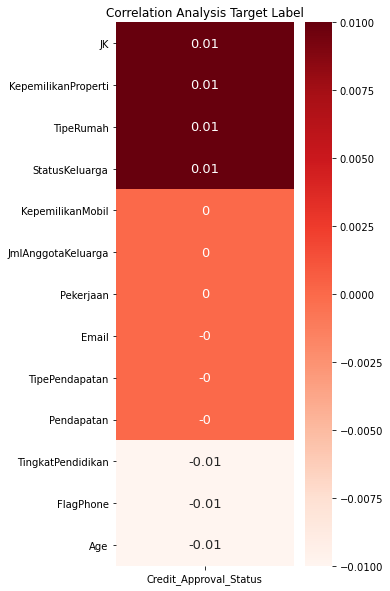

In [44]:
# Analysis correlation in dataset
plt.figure(figsize=(4,10))
cor = credit_approval_data.corr()
cor = cor.sort_values(by='Credit_Approval_Status', ascending=False)
x = round(cor[['Credit_Approval_Status']].iloc[1:], 2)
sns.heatmap(x, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 13})
plt.title("Correlation Analysis Target Label")
plt.show()

#Correlation with output variable
cor_target = abs(round(cor['Credit_Approval_Status'],2)).sort_values(ascending=False)
cor_target = cor_target.to_frame().reset_index()
cor_target = cor_target.iloc[1:].rename(columns={"index": "features", "'Credit_Approval_Status'": "corr"})

Variables “JK” or gender, “KepemilikanProperti”, “TipeRumah” and “StatusKeluarga” has higher positive correlation than other variables, while variables “TingkatPendidikan”, “FlagPhone” and “Age” has negative correlation.


In [45]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(7, 7))
        ax=sns.countplot(y=credit_approval_data[feature] , hue = "Credit_Approval_Status", data=credit_approval_data)
        total = len(credit_approval_data[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

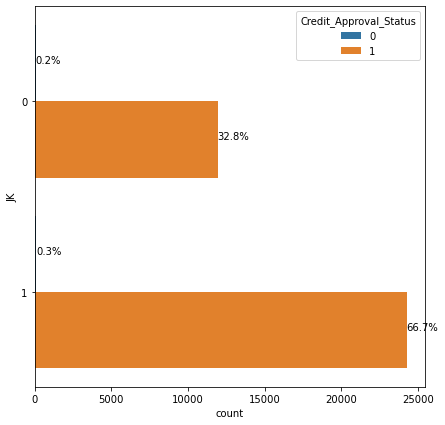

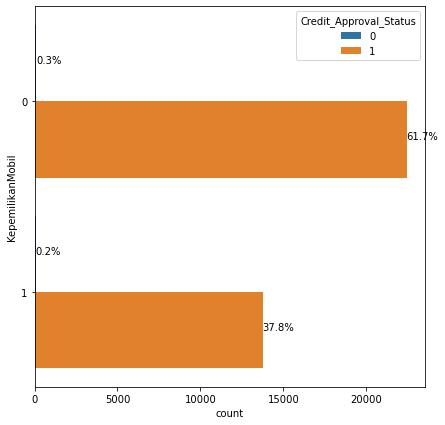

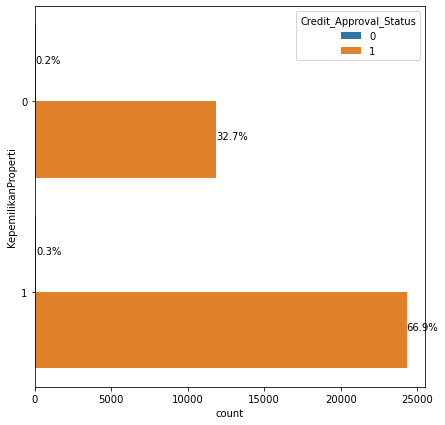

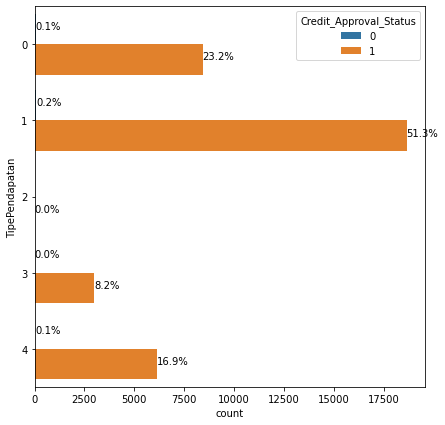

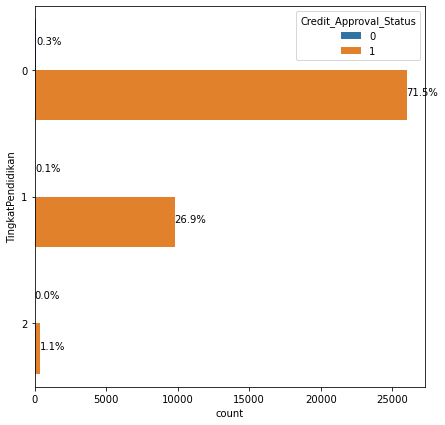

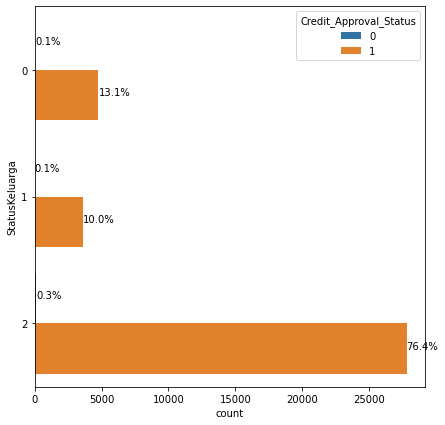

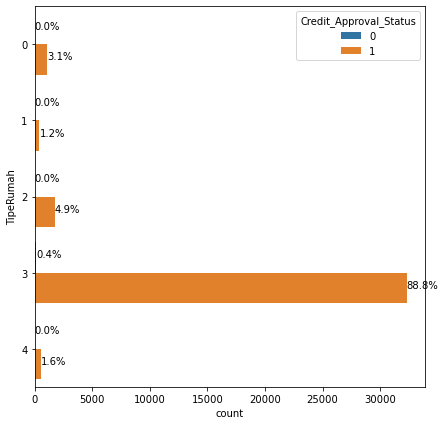

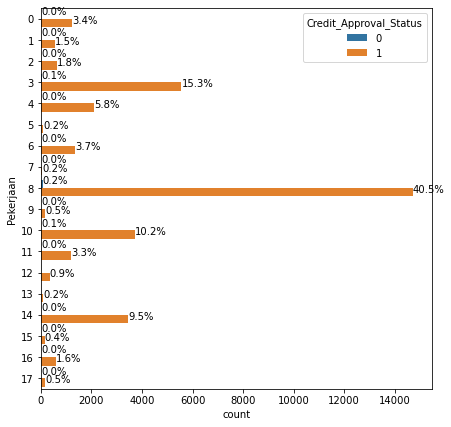

In [46]:
countplot_applicants(['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
                      'TingkatPendidikan','StatusKeluarga', 'TipeRumah', 'Pekerjaan'])

### Splitting the credit_approval_data into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = credit_approval_data.drop('Credit_Approval_Status', axis=1)
y = credit_approval_data['Credit_Approval_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train

JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  TipePendapatan  \
19916   1                 1                    1    157500.0               1   
28337   1                 1                    1    560250.0               1   
16169   1                 0                    0    135000.0               1   
19976   1                 1                    0    112500.0               1   
32472   1                 0                    0     90000.0               1   
...    ..               ...                  ...         ...             ...   
16850   1                 1                    1    112500.0               1   
6265    1                 0                    1     99000.0               4   
11284   1                 0                    1     67500.0               0   
860     1                 0                    0    198000.0               4   
15795   1                 0                    0    135000.0               0   

       TingkatPendidikan  StatusKeluarga  TipeRumah  FlagPhone  Email  \
19916                  1               2          3          0      0   
28337                  0               0          3          0      0   
16169                  0               0          3          0      0   
19976                  0               1          3          0      0   
32472                  0               2          3          1      0   
...                  ...             ...        ...        ...    ...   
16850                  0               2          3          0      0   
6265                   0               2          3          0      0   
11284                  0               2          3          0      0   
860                    0               1          3          1      0   
15795                  0               1          3          0      0   

       Pekerjaan  JmlAnggotaKeluarga  Age  
19916         10                   3   46  
28337         14                   2   36  
16169          8                   1   32  
19976          8                   1   54  
32472         15                   2   48  
...          ...                 ...  ...  
16850         11                   6   38  
6265           8                   2   58  
11284          0                   3   52  
860            8                   1   60  
15795         12                   2   29  

[25445 rows x 13 columns]

### Modelling

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , f1_score
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score

**1. Decision Tree Modelling**

In [51]:
#Fit Model
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_train_pred_dt = DT_model.predict(X_train)
y_test_pred_dt = DT_model.predict(X_test)

**Model Evaluation DT**

In [52]:
#Model Evaluation
acc_score_dt = accuracy_score(y_test, y_test_pred_dt)
f1_score_dt = f1_score(y_test, y_test_pred_dt)

In [53]:
acc_score_dt

0.9935809261806511

In [54]:
f1_score_dt

0.9967768671148357

**Overfit Checking DT**

In [55]:
print("mae_train :", mean_absolute_error(y_train, y_train_pred_dt))
print("mae_test :", mean_absolute_error(y_test, y_test_pred_dt))

mae_train : 0.002436628021222244
mae_test : 0.006419073819348923


The training MAE is around 0.02 while testing MAE is 0.06, there is an indication that the model is overfit

**Imbalance Dataset DT**

In [56]:
credit_approval_data.Credit_Approval_Status.value_counts()

1    36176
0      174
Name: Credit_Approval_Status, dtype: int64

from the result above, 'good status' and 'bad status' are imbalanced, hence need to take further action, try to overcome with oversampling  

In [57]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 1    25325
0      120
Name: Credit_Approval_Status, dtype: int64
Resample dataset shape 0    25325
1    25325
Name: Credit_Approval_Status, dtype: int64


In [58]:
#Fit Model smote
DT_model = DecisionTreeClassifier()
DT_model.fit(x_smote, y_smote)
y_train_pred_dt_smote = DT_model.predict(X_train)
y_test_pred_dt_smote = DT_model.predict(X_test)

In [59]:
#Model Evaluation
acc_score_dt_smote = accuracy_score(y_test, y_test_pred_dt_smote)
f1_score_dt_smote = f1_score(y_test, y_test_pred_dt_smote)

In [60]:
acc_score_dt_smote

0.9873452544704264

In [61]:
f1_score_dt_smote

0.9936229205175601

In [62]:
#Check Overfit
print("mae_train :", mean_absolute_error(y_train, y_train_pred_dt_smote))
print("mae_test :", mean_absolute_error(y_test, y_test_pred_dt_smote))

mae_train : 0.0041265474552957355
mae_test : 0.01265474552957359


The training Smote MAE is around 0.02 while testing Smote MAE is 0.06, there is an indication that the model is overfit and seem not better than model not using oversampling method. Hence, we try other method using cross validation

**Cross Validation DT**

In [63]:
DT_model = DecisionTreeClassifier()
print(cross_val_score(DT_model, X, y, scoring="f1", cv = 5))
mean_score = cross_val_score(DT_model, X, y, scoring="f1", cv = 5).mean()
std_score = cross_val_score(DT_model, X, y, scoring="f1", cv = 5).std()
print(mean_score)
print(std_score)

[0.99048677 0.98936096 0.98844494 0.98682835 0.98397817]
0.9877206759351894
0.001941864168674675


**2. K-Nearest Tree Neigbors**

In [64]:
#Fit Model
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

**Model Evaluation KNN**

In [65]:
#Model Evaluation
acc_score_knn = accuracy_score(y_test, y_test_pred_knn)
f1_score_knn = f1_score(y_test, y_test_pred_knn)

In [66]:
acc_score_knn

0.9950481430536451

In [67]:
f1_score_knn

0.9975179260893546

**Overfit Cheking KNN**

In [68]:
print("mae_train :", mean_absolute_error(y_train, y_train_pred_knn))
print("mae_test :", mean_absolute_error(y_test, y_test_pred_knn))

mae_train : 0.004716054234623698
mae_test : 0.0049518569463548835


The training MAE for knn is around 0.04 while testing MAE is 0.04, there is no indication that the model is overfit, hence, knn is good model

**Imbalance Dataset KNN**

In [69]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 1    25325
0      120
Name: Credit_Approval_Status, dtype: int64
Resample dataset shape 0    25325
1    25325
Name: Credit_Approval_Status, dtype: int64


In [70]:
#Fit Model smote
knn_model_smote = KNeighborsClassifier(n_neighbors=20)
knn_model_smote.fit(x_smote, y_smote)
y_train_pred_knn_smote = knn_model_smote.predict(X_train)
y_test_pred_knn_smote = knn_model_smote.predict(X_test)

In [71]:
#Model Evaluation
acc_score_knn_smote = accuracy_score(y_test, y_test_pred_knn_smote)
f1_score_knn_smote = f1_score(y_test, y_test_pred_knn_smote)

In [72]:
acc_score_knn_smote

0.9093076570380559

In [73]:
f1_score_knn_smote

0.9523947051744887

In [74]:
#Check Overfit smote knn
print("mae_train :", mean_absolute_error(y_train, y_train_pred_knn_smote))
print("mae_test :", mean_absolute_error(y_test, y_test_pred_knn_smote))

mae_train : 0.07950481430536452
mae_test : 0.09069234296194406


The training MAE for knn is around 0.08 while testing MAE is 0.09, there is small indication that the model is overfit

### Predicting Test Data

In [75]:
test_data = pd.read_csv("data_test.csv")

In [76]:
test_data.head()

Id_customer         JK KepemilikanMobil KepemilikanProperti  JmlAnak  \
0      5142248  Perempuan            Tidak                  Ya        0   
1      5036925  Perempuan               Ya                  Ya        0   
2      5126080  Perempuan            Tidak                  Ya        1   
3      5088887  Perempuan            Tidak                  Ya        0   
4      5022156  Perempuan               Ya                  Ya        2   

   Pendapatan      TipePendapatan TingkatPendidikan StatusKeluarga  \
0      225000                 PNS          Graduate        Menikah   
1      157500  Asosiasi komersial          Graduate        Menikah   
2      112500                 PNS          Graduate        Menikah   
3      171000             Bekerja          Graduate  Belum Menikah   
4      180000  Asosiasi komersial      Postgraduate        Menikah   

        TipeRumah  FlagMobile  FlagWorkPhone  FlagPhone  Email  \
0   Rumah pribadi           1              0          0      0   
1   Rumah pribadi           1              1          1      1   
2   Rumah pribadi           1              0          0      0   
3  Sewa Apartemen           1              0          0      0   
4   Rumah pribadi           1              0          1      1   

               Pekerjaan  JmlAnggotaKeluarga  Age  Experience  
0  Private service staff                   2   54           6  
1             Core staff                   2   33           8  
2               Managers                   3   41           7  
3               Laborers                   1   46           2  
4                    NaN                   4   32           8

**Data Pre Processing Test Data**

In [77]:
#Replace missing values with conditions
common = test_data['Pekerjaan'].isnull()
all_conditions = [(test_data['JK'] == 'Laki-laki') & (test_data['TingkatPendidikan'] == 'Graduate') & (common),
                  (test_data['JK'] == 'Laki-laki') & (test_data['TingkatPendidikan'] == 'Postgraduate') & (common),
                  (test_data['JK'] == 'Laki-laki') & (test_data['TingkatPendidikan'] == 'Undergraduate') & (common),
                  (test_data['JK'] == 'Perempuan') & (test_data['TingkatPendidikan'] == 'Graduate') & (common),
                  (test_data['JK'] == 'Perempuan') & (test_data['TingkatPendidikan'] == 'Postgraduate') & (common),
                  (test_data['JK'] == 'Perempuan') & (test_data['TingkatPendidikan'] == 'Undergraduate') & (common)]

fill_with = fill_with = ['Laborers', 'Managers', 'Laborers', 'Laborers', 'Core staff', 'Laborers']
test_data['Pekerjaan'] = np.select(all_conditions, fill_with, default=test_data['Pekerjaan'])

In [78]:
test_data.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
dtype: int64

In [79]:
#Remove unneccessary or unwanted data
test_data = test_data.drop(['FlagMobile', 'JmlAnak', 'Experience', 'FlagWorkPhone'], axis=1)

In [80]:
#Encoding categorical to numerical values
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(test_data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        test_data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [81]:
categorical_features = ['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
                      'TingkatPendidikan','StatusKeluarga', 'TipeRumah', 'Pekerjaan']
Cat_to_Num(categorical_features)

JK --> {'Laki-laki': 0, 'Perempuan': 1}
KepemilikanMobil --> {'Tidak': 0, 'Ya': 1}
KepemilikanProperti --> {'Tidak': 0, 'Ya': 1}
TipePendapatan --> {'Asosiasi komersial': 0, 'Bekerja': 1, 'PNS': 2, 'Pensioner': 3}
TingkatPendidikan --> {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
StatusKeluarga --> {'Belum Menikah': 0, 'Cerai': 1, 'Menikah': 2}
TipeRumah --> {'Apartemen Pribadi': 0, 'Apartemen kantor': 1, 'Rumah orang tua': 2, 'Rumah pribadi': 3, 'Sewa Apartemen': 4}
Pekerjaan --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'High skill tech staff': 5, 'Laborers': 6, 'Managers': 7, 'Medicine staff': 8, 'Private service staff': 9, 'Sales staff': 10, 'Security staff': 11, 'Waiters/barmen staff': 12}


In [82]:
#drop Id_customer
test_data_pred = test_data.drop(['Id_customer'], axis=1)

In [83]:
test_data_pred

JK  KepemilikanMobil  KepemilikanProperti  Pendapatan  TipePendapatan  \
0     1                 0                    1      225000               2   
1     1                 1                    1      157500               0   
2     1                 0                    1      112500               2   
3     1                 0                    1      171000               1   
4     1                 1                    1      180000               0   
..   ..               ...                  ...         ...             ...   
195   0                 0                    1      360000               1   
196   1                 0                    1      135000               3   
197   1                 0                    0       67500               1   
198   0                 1                    1      270000               0   
199   1                 0                    1       90000               1   

     TingkatPendidikan  StatusKeluarga  TipeRumah  FlagPhone  Email  \
0                    0               2          3          0      0   
1                    0               2          3          1      1   
2                    0               2          3          0      0   
3                    0               0          4          0      0   
4                    1               2          3          1      1   
..                 ...             ...        ...        ...    ...   
195                  0               2          3          0      0   
196                  0               2          3          0      0   
197                  0               2          3          0      0   
198                  1               2          3          0      0   
199                  0               2          3          0      0   

     Pekerjaan  JmlAnggotaKeluarga  Age  
0            9                   2   54  
1            3                   2   33  
2            7                   3   41  
3            6                   1   46  
4            3                   4   32  
..         ...                 ...  ...  
195          6                   2   50  
196          6                   2   56  
197          6                   3   45  
198          7                   2   58  
199          2                   2   45  

[200 rows x 13 columns]

In [84]:
#Data Prediction using knn model
test_data["value"] = DT_model.predict(test_data_pred)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
test_data["value"].value_counts()

In [ ]:
test_data[['Id_customer', 'value']]

In [ ]:
test_data_pred_filter = test_data[['Id_customer', 'value']]
test_data_pred_filter = test_data_pred_filter.rename(columns={'Id_customer': 'id'})

In [ ]:
test_data_pred_filter.to_csv("test_data_pred_dt.csv")

In [ ]:
test_data["value"].value_counts()

In [ ]:
test_data_pred_filter = test_data[['Id_customer', 'value']]
test_data_pred_filter = test_data_pred_filter.rename(columns={'Id_customer': 'id'})

In [ ]:
test_data_pred_filter.to_csv("test_data_pred_knn_smote.csv")

### Interpretation using Lime

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

In [ ]:
#knn_model
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=knn_model.predict_proba
)

exp.show_in_notebook(show_table=True)

For the first instance, The model is 100% confident this is good credit applicant. The values of Flag Phone, Tipe pendapatan, Jml Anggota Keluarga, JK, Tingkat Pendidikan increase applicant’s chance to be classified as good credit.


In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=knn_model_smote.predict_proba
)

exp.show_in_notebook(show_table=True)

For the first instance, The model is 100% confident this is good credit applicant. The values of Pendapatan, Flag Phone, Tipe Rumah, Age, Kepemilikan Properti, Kepemilikan Mobil  increase applicant’s chance to be classified as good credit